In [1]:
import requests as r
import numpy as np
import pandas as pd
import json

import seaborn as sb
import matplotlib.pyplot as plt 
sb.set() # set the default Seaborn style for graphics

In [2]:
df1 = pd.read_csv('Final-CLEAN-Dataset.csv')
df1.head(n = 10)

,ID,Title,Decade,Age of Movie,Age Category,IMDb,Rotten,Availability,Genres,Country,Language,Runtime
0,1,Inception,2010s,12,13+,8.8,87,1,Action,United States,English,148
1,2,The Matrix,1990s,23,18+,8.7,87,1,Action,United States,English,136
2,3,Avengers: Infinity War,2010s,4,13+,8.5,84,1,Action,United States,English,149
3,4,Back to the Future,1980s,37,7+,8.5,96,1,Adventure,United States,English,116
4,5,"The Good, the Bad and the Ugly",1960s,56,18+,8.8,97,2,Western,Italy,Italian,161
5,6,Spider-Man: Into the Spider-Verse,2010s,4,7+,8.4,97,1,Animation,United States,English,117
6,7,The Pianist,2000s,20,18+,8.5,95,2,Biography,United Kingdom,English,150
7,8,Django Unchained,2010s,10,18+,8.4,87,1,Drama,United States,English,165
8,9,Raiders of the Lost Ark,1980s,41,7+,8.4,95,1,Action,United States,English,115
9,10,Inglourious Basterds,2000s,13,18+,8.3,89,1,Adventure,Germany,English,153


In [3]:
df1.describe()

,ID,Age of Movie,IMDb,Rotten,Availability,Runtime
count,5556.000000,5556.000000,5556.000000,5556.000000,5556.000000,5556.000000
mean,2778.500000,14.583693,6.230148,60.207163,1.055796,100.980202
std,1604.023379,13.990212,1.078126,22.265142,0.234205,22.003043
min,1.000000,1.000000,1.100000,2.000000,1.000000,2.000000
25%,1389.750000,5.000000,5.600000,45.000000,1.000000,90.000000
50%,2778.500000,10.000000,6.300000,61.000000,1.000000,99.000000
75%,4167.250000,19.000000,7.000000,77.000000,1.000000,110.250000
max,5556.000000,120.000000,9.000000,100.000000,3.000000,359.000000


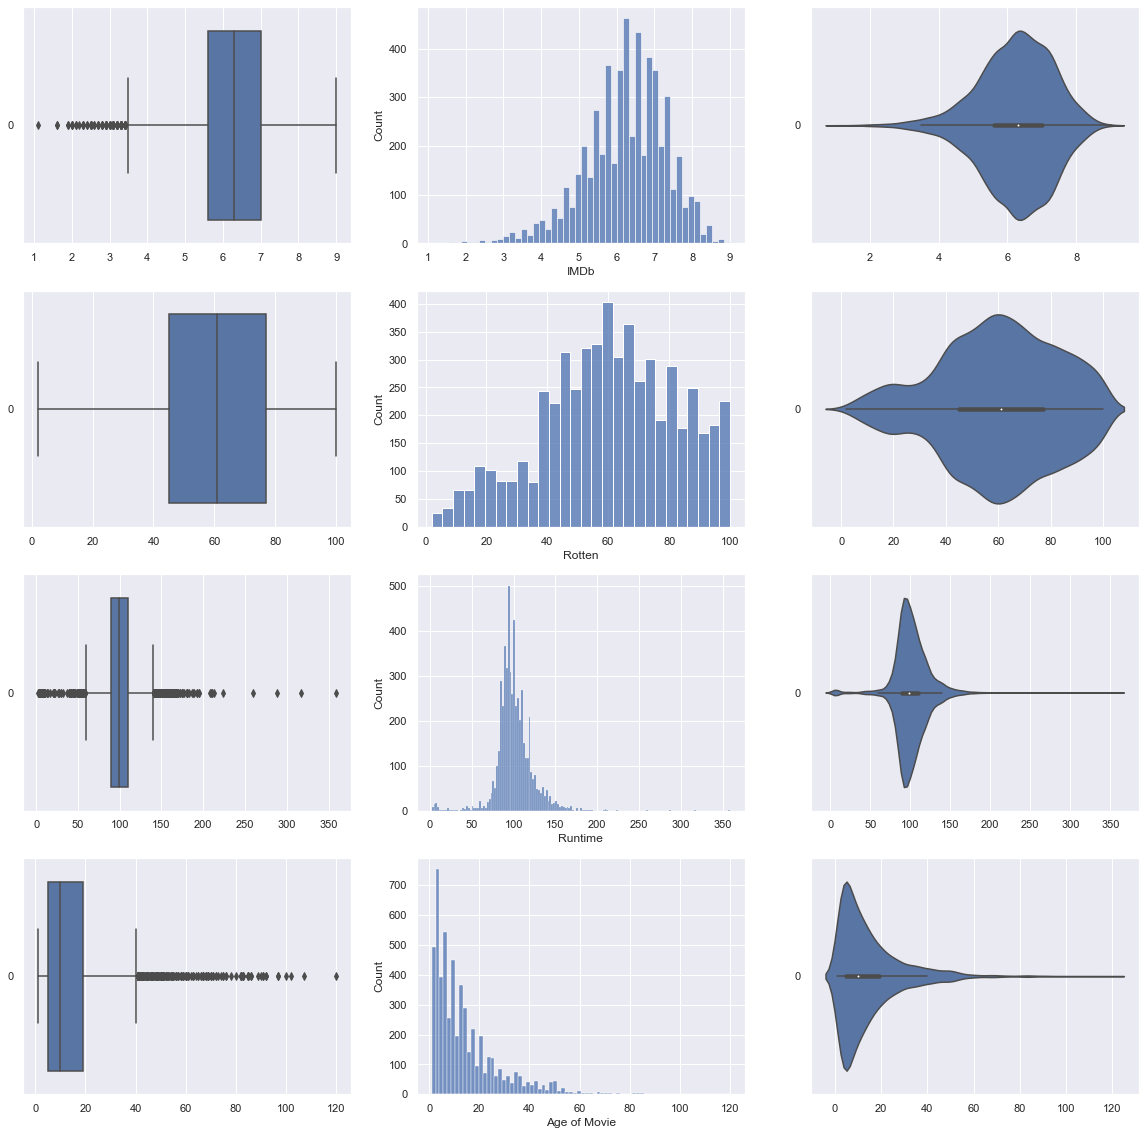

In [4]:
df1_numeric = ["IMDb", "Rotten", "Runtime", "Age of Movie"]
# Draw boxplot, histplot and violinplot of IMDb, Rotten and Runtime
f, axes = plt.subplots(4, 3, figsize=(20, 20))

count = 0
for i in df1_numeric:
    sb.boxplot(data = df1[i], orient = "h", ax = axes[count,0])
    sb.histplot(data = df1[i], ax = axes[count,1])
    sb.violinplot(data = df1[i], orient = "h", ax = axes[count,2])
    count += 1

## Removing outliers

We decided to remove outliers from the Runtime variable as there were many data points outside the Box and Whiskers plot

In [5]:
# Quantile 25% and 75%
Q1 = df1['Runtime'].quantile(0.25)
Q3 = df1['Runtime'].quantile(0.75)

#Interquartile range (IQR)
IQR = Q3 - Q1

# Remove the outliers
moviedata = df1.drop(df1[(df1['Runtime'] <= Q1 - 1.5*IQR) | (df1['Runtime'] >= Q3 + 1.5*IQR)].index)
moviedata

,ID,Title,Decade,Age of Movie,Age Category,IMDb,Rotten,Availability,Genres,Country,Language,Runtime
1,2,The Matrix,1990s,23,18+,8.7,87,1,Action,United States,English,136
3,4,Back to the Future,1980s,37,7+,8.5,96,1,Adventure,United States,English,116
5,6,Spider-Man: Into the Spider-Verse,2010s,4,7+,8.4,97,1,Animation,United States,English,117
8,9,Raiders of the Lost Ark,1980s,41,7+,8.4,95,1,Action,United States,English,115
10,11,Taxi Driver,1970s,46,18+,8.3,95,1,Crime,United States,English,114
...,...,...,...,...,...,...,...,...,...,...,...,...
5543,5544,Own the Room,2020s,1,7+,6.4,46,1,Documentary,United States,English,91
5544,5545,Unidentified Flying Oddball,1970s,43,all,5.2,45,1,Adventure,United States,English,93
5546,5547,'Twas the Night,2000s,21,all,5.3,45,1,Comedy,United States,English,84
5551,5552,The Story of the Animated Drawing,1950s,67,all,7.6,41,1,Adventure,United States,English,60


In [6]:
moviedata.describe()

,ID,Age of Movie,IMDb,Rotten,Availability,Runtime
count,5216.000000,5216.000000,5216.000000,5216.000000,5216.000000,5216.000000
mean,2763.293712,14.524156,6.179870,59.836273,1.057132,100.319018
std,1581.942544,13.671695,1.064067,22.375588,0.237022,14.473748
min,2.000000,1.000000,1.100000,2.000000,1.000000,60.000000
25%,1386.750000,5.000000,5.600000,45.000000,1.000000,90.000000
50%,2752.500000,10.000000,6.300000,60.000000,1.000000,98.000000
75%,4143.250000,19.000000,6.900000,76.000000,1.000000,109.000000
max,5554.000000,102.000000,9.000000,100.000000,3.000000,140.000000


In [7]:
moviedata = moviedata.reset_index()
moviedata = moviedata.drop(columns = ['ID', 'index'])
ID = []
for i in range(1, len(moviedata) + 1):
    ID.append(i)
moviedata.insert(0, "ID", ID)
moviedata

,ID,Title,Decade,Age of Movie,Age Category,IMDb,Rotten,Availability,Genres,Country,Language,Runtime
0,1,The Matrix,1990s,23,18+,8.7,87,1,Action,United States,English,136
1,2,Back to the Future,1980s,37,7+,8.5,96,1,Adventure,United States,English,116
2,3,Spider-Man: Into the Spider-Verse,2010s,4,7+,8.4,97,1,Animation,United States,English,117
3,4,Raiders of the Lost Ark,1980s,41,7+,8.4,95,1,Action,United States,English,115
4,5,Taxi Driver,1970s,46,18+,8.3,95,1,Crime,United States,English,114
...,...,...,...,...,...,...,...,...,...,...,...,...
5211,5212,Own the Room,2020s,1,7+,6.4,46,1,Documentary,United States,English,91
5212,5213,Unidentified Flying Oddball,1970s,43,all,5.2,45,1,Adventure,United States,English,93
5213,5214,'Twas the Night,2000s,21,all,5.3,45,1,Comedy,United States,English,84
5214,5215,The Story of the Animated Drawing,1950s,67,all,7.6,41,1,Adventure,United States,English,60


In [8]:
moviedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5216 entries, 0 to 5215
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            5216 non-null   int64  
 1   Title         5216 non-null   object 
 2   Decade        5216 non-null   object 
 3   Age of Movie  5216 non-null   int64  
 4   Age Category  5216 non-null   object 
 5   IMDb          5216 non-null   float64
 6   Rotten        5216 non-null   int64  
 7   Availability  5216 non-null   int64  
 8   Genres        5216 non-null   object 
 9   Country       5216 non-null   object 
 10  Language      5216 non-null   object 
 11  Runtime       5216 non-null   int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 489.1+ KB


## Numeric Variables

Our numeric variables include IMDb scores, Rotten Tomatoes scores, the Runtime of the movie and the Age of the movie.

The Rotten Tomatoes score is calculated based on the percentage of critics that gave the movie a good review.

The distribution of the numerical variables are shown below.

In [9]:
EDA_numeric = ["IMDb", "Rotten", "Runtime", "Age of Movie"]

In [10]:
moviedata[EDA_numeric].describe()

,IMDb,Rotten,Runtime,Age of Movie
count,5216.000000,5216.000000,5216.000000,5216.000000
mean,6.179870,59.836273,100.319018,14.524156
std,1.064067,22.375588,14.473748,13.671695
min,1.100000,2.000000,60.000000,1.000000
25%,5.600000,45.000000,90.000000,5.000000
50%,6.300000,60.000000,98.000000,10.000000
75%,6.900000,76.000000,109.000000,19.000000
max,9.000000,100.000000,140.000000,102.000000


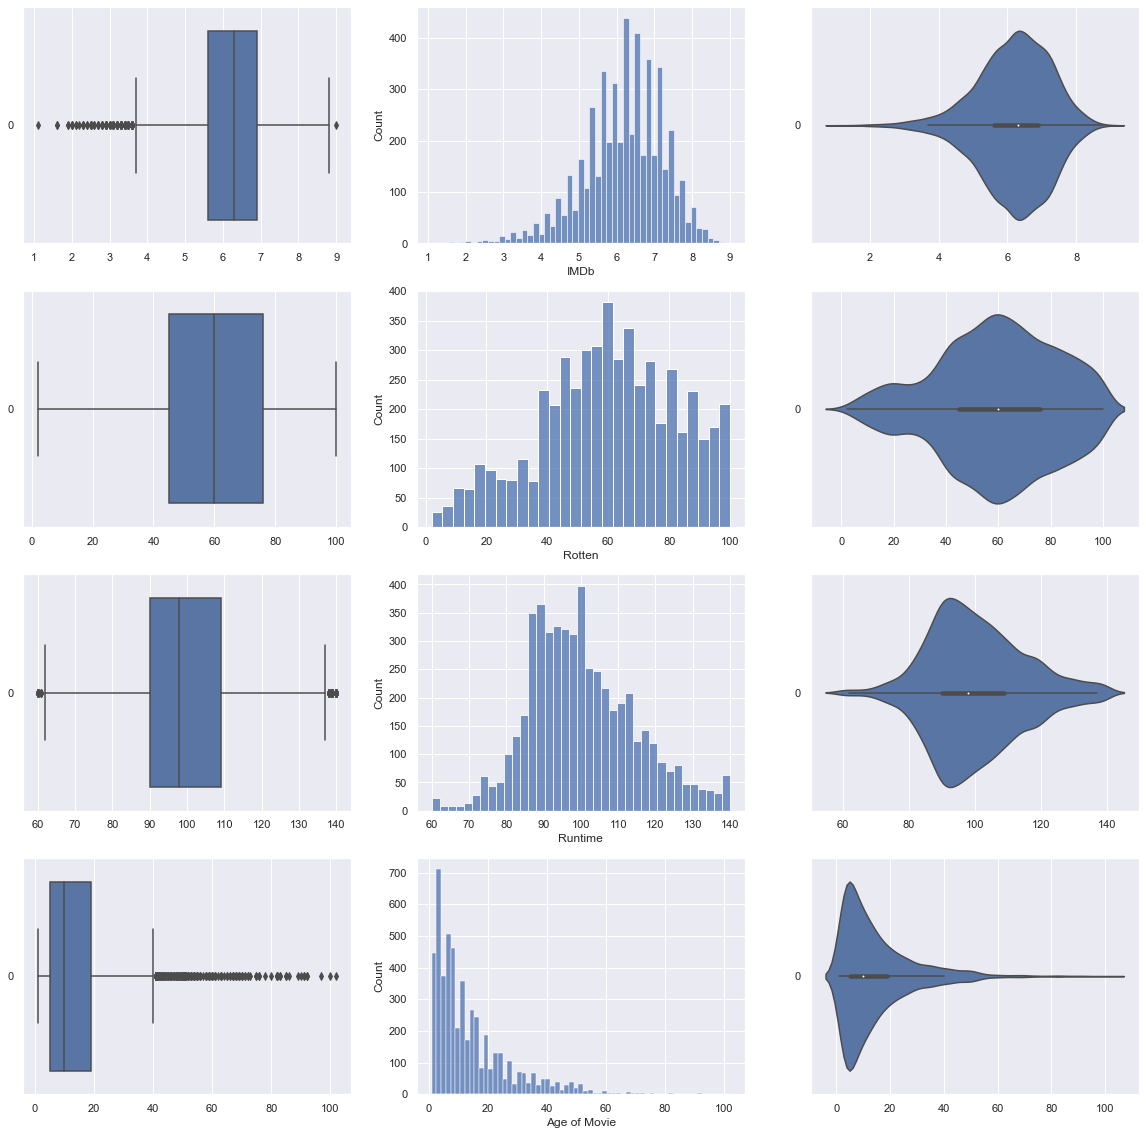

In [11]:
# Draw boxplot, histplot and violinplot of IMDb, Rotten and Runtime
f, axes = plt.subplots(4, 3, figsize=(20, 20))

count = 0
for i in EDA_numeric:
    sb.boxplot(data = moviedata[i], orient = "h", ax = axes[count,0])
    sb.histplot(data = moviedata[i], ax = axes[count,1])
    sb.violinplot(data = moviedata[i], orient = "h", ax = axes[count,2])
    count += 1

## Categorical Variables

Categorical Variables include the Decade the movie came out, the Age rating of the movie, Availability of the movie on streaming platforms, the Genre of the movie, the Country of origin, and the Main Language spoken throughout the movie.

Availiability is the number of streaminf platforms the movie is on.

In [34]:
EDA_categorical = ["Decade", "Age Category", "Availability", "Genres", "Country", "Language"]


# Orders for catplot

Age_Category_order = ["18+", "16+", "13+", "7+", "all"]

Availability_order = [1, 2, 3]

Genres_order = ["Comedy", "Drama", "Action", "Documentary", "Animation", "Crime", "Horror", "Biography", "Adventure", 
                "Thriller", "Family", "Fantasy", "Mystery", "Romance", "Western", "Sci-Fi", "Music", "Sport", "Musical", 
                "War", "Talk-Show"]

Country_order = moviedata["Country"].value_counts()[:10].index.tolist()

Language_order = ["English", "French", "Hindi", "Spanish", "Japanese", "Italian", "Mandarin", "Korean", "Arabic", "German"]

In [14]:
moviedata["Age Category"].value_counts()

18+    2617
13+    1095
7+      940
all     359
16+     205
Name: Age Category, dtype: int64

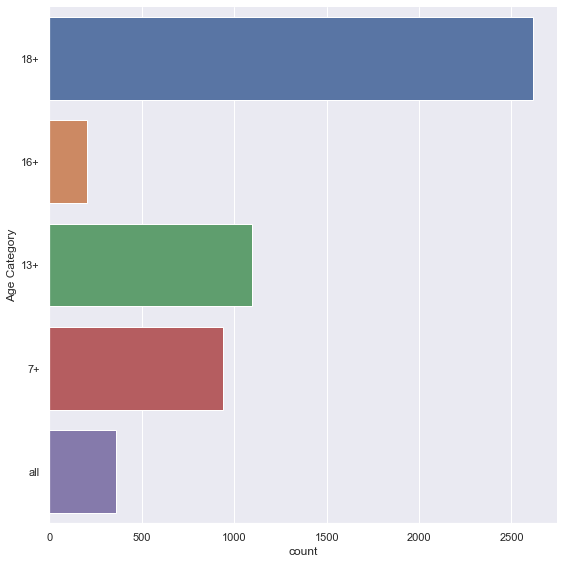

In [15]:
sb.catplot(y = "Age Category", data = moviedata[EDA_categorical], kind = "count", order = Age_Category_order, height = 8)

In [16]:
moviedata["Availability"].value_counts()

1    4924
2     286
3       6
Name: Availability, dtype: int64

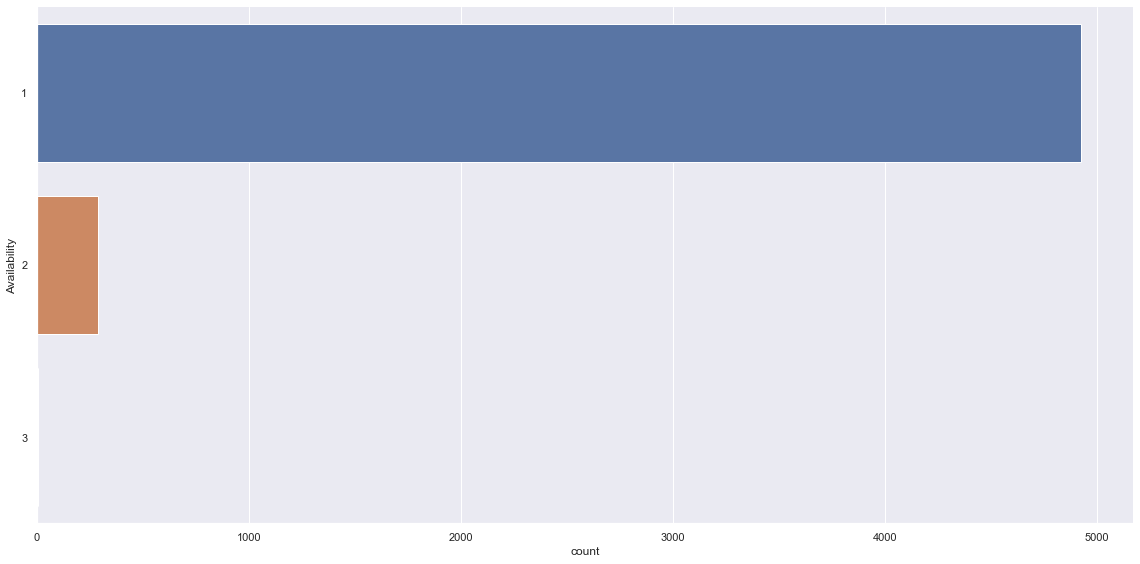

In [17]:
sb.catplot(y = "Availability", data = moviedata[EDA_categorical], kind = "count", order = Availability_order, height = 8, aspect=2)

In [18]:
moviedata["Genres"].value_counts()

Comedy         1307
Drama          1012
Action          882
Documentary     427
Animation       339
Crime           298
Horror          273
Biography       268
Adventure       259
Thriller         48
Family           23
Fantasy          20
Mystery          16
Romance          13
Western          11
Sci-Fi           10
Music             4
Sport             2
Musical           2
War               1
Talk-Show         1
Name: Genres, dtype: int64

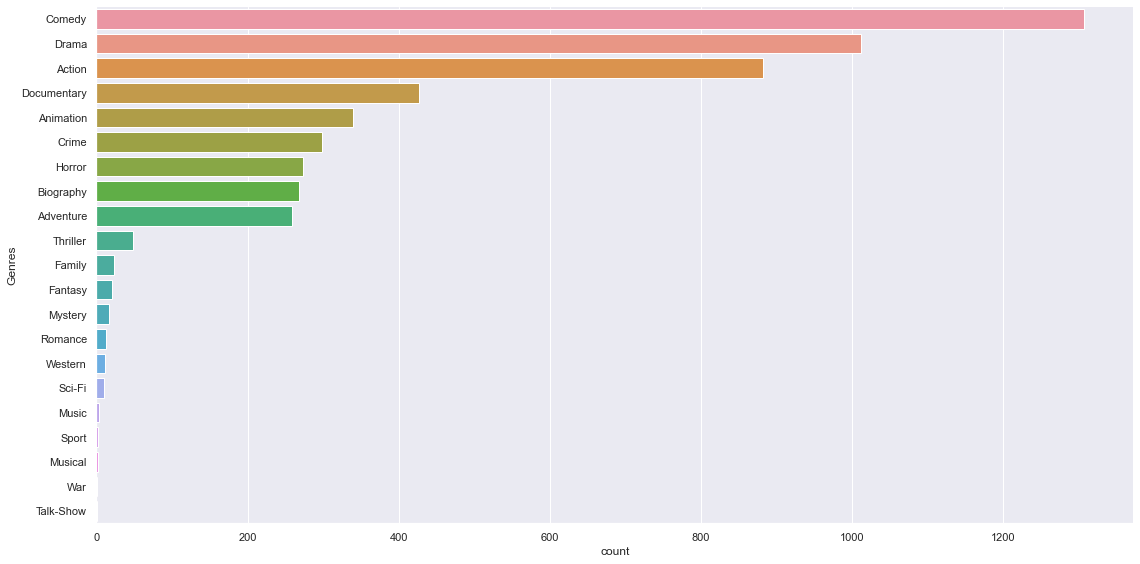

In [19]:
sb.catplot(y = "Genres", data = moviedata[EDA_categorical], kind = "count", order = Genres_order, height = 8, aspect = 2)

In [20]:
moviedata["Country"].value_counts()

United States     3387
United Kingdom     534
Canada             250
France             151
India              106
                  ... 
Nepal                1
Bangladesh           1
Paraguay             1
Malta                1
Bolivia              1
Name: Country, Length: 78, dtype: int64

### Movies come from many countries, therefore, we choose the top 10 countries with the highest numbers of movies.

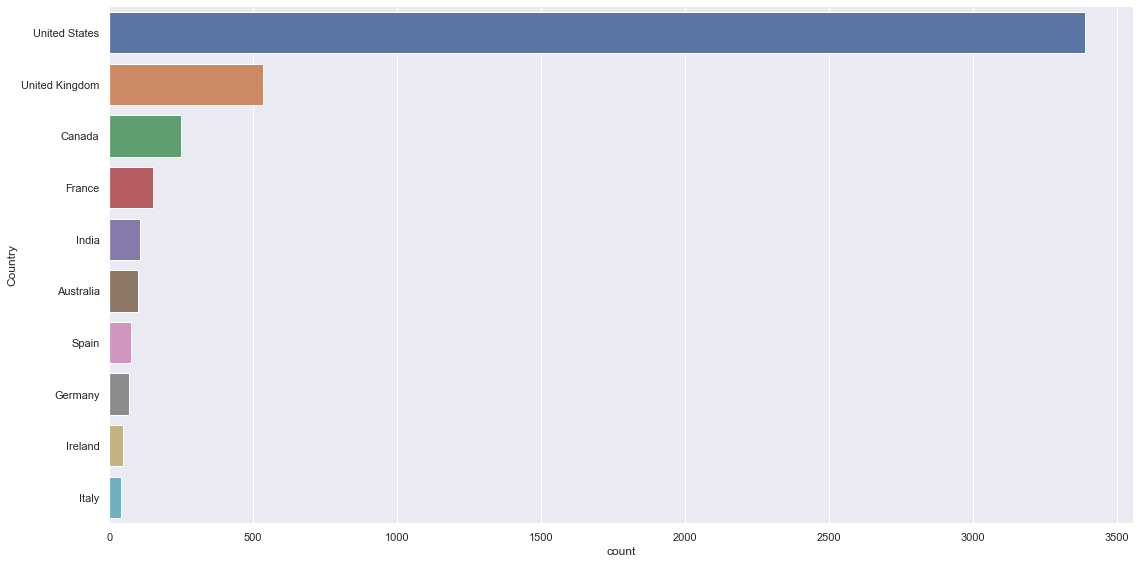

In [21]:
sb.catplot(y = "Country", data = moviedata[EDA_categorical], kind = "count", order = Country_order, height = 8, aspect = 2)

In [22]:
moviedata["Language"].value_counts()

English                   4603
French                      94
Hindi                       93
Spanish                     89
Japanese                    37
Italian                     30
Mandarin                    30
Korean                      26
Arabic                      20
German                      18
Indonesian                  17
Cantonese                   15
Turkish                     12
Polish                      11
Swedish                     11
Russian                     10
Portuguese                  10
Danish                       8
Norwegian                    8
Filipino                     7
Thai                         7
Chinese                      6
Tagalog                      4
Catalan                      3
Hebrew                       3
Icelandic                    3
Dutch                        3
Tamil                        2
None                         2
Afrikaans                    2
American Sign Language       2
Telugu                       2
Khmer   

### Similarly, there were too many languages, therefore our team choose the top 10 languages in terms of number of movies.

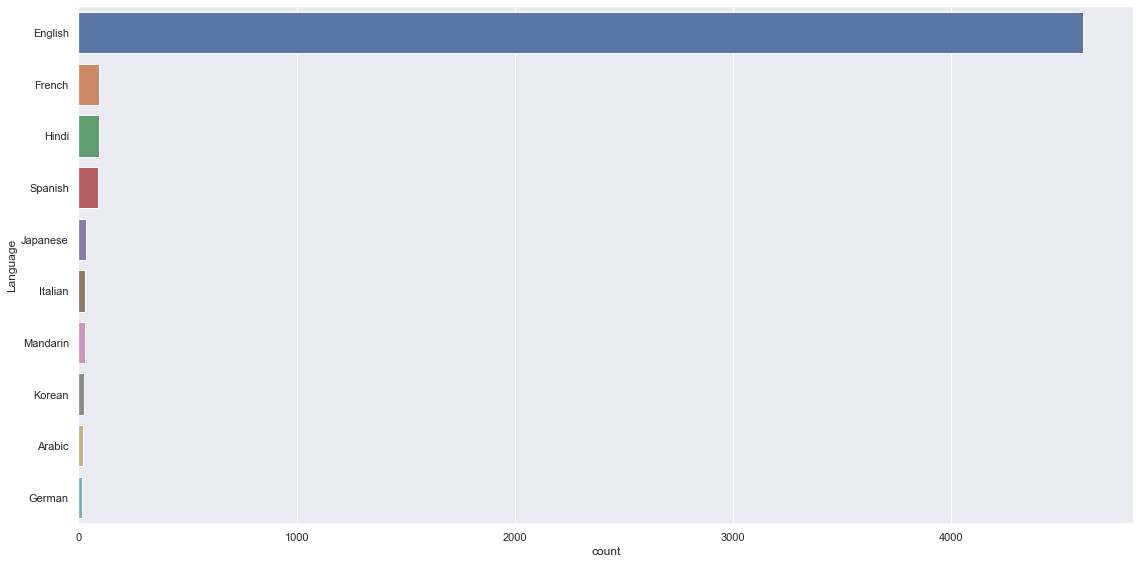

In [23]:
sb.catplot(y = "Language", data = moviedata[EDA_categorical], kind = "count", order = Language_order, height = 8, aspect = 2)

## Correlation

In [24]:
IMDb = pd.DataFrame(moviedata["IMDb"])
Rotten = pd.DataFrame(moviedata["Rotten"])
Runtime = pd.DataFrame(moviedata["Runtime"])
Age_of_Movie = pd.DataFrame(moviedata["Age of Movie"])

<AxesSubplot:>

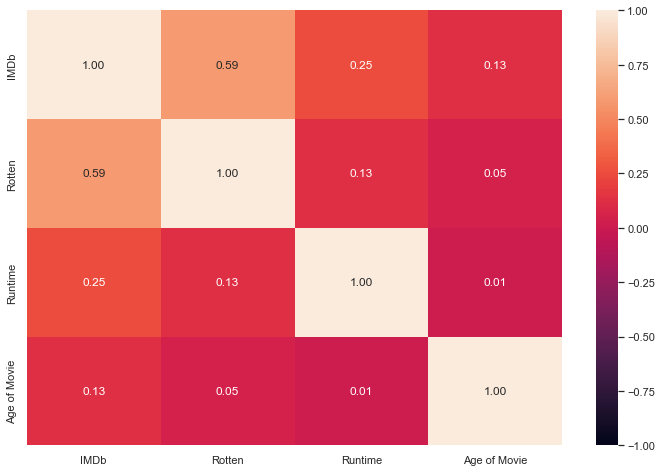

In [25]:
numeric_corr = pd.concat([IMDb, Rotten, Runtime, Age_of_Movie], axis = 1)

f = plt.figure(figsize=(12, 8))
sb.heatmap(numeric_corr.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

As seen from the heatmap, the correlation between IMDb scores and the other numerical data is low, except for the Rotten Tomatoes score, which has a correlation of 0.59. All other variables have a correlation of 0.13 and below

# Drop Languages & Countries that are not the Top 10

In [26]:
# Drop Languagues and Countries that are not in Top 10
List = Country_order + Language_order
drop_List = []

for i in range(0, len(moviedata)):
    if (moviedata["Language"][i] not in List) or (moviedata["Country"][i] not in List):
        drop_List.append(i)

moviedata = moviedata.drop(drop_List) 

In [27]:
# Reindex the file
moviedata = moviedata.reset_index()
moviedata = moviedata.drop(columns = ['ID', 'index'])
ID = []
for i in range(1, len(moviedata) + 1):
    ID.append(i)
moviedata.insert(0, "ID", ID)
moviedata

,ID,Title,Decade,Age of Movie,Age Category,IMDb,Rotten,Availability,Genres,Country,Language,Runtime
0,1,The Matrix,1990s,23,18+,8.7,87,1,Action,United States,English,136
1,2,Back to the Future,1980s,37,7+,8.5,96,1,Adventure,United States,English,116
2,3,Spider-Man: Into the Spider-Verse,2010s,4,7+,8.4,97,1,Animation,United States,English,117
3,4,Raiders of the Lost Ark,1980s,41,7+,8.4,95,1,Action,United States,English,115
4,5,Taxi Driver,1970s,46,18+,8.3,95,1,Crime,United States,English,114
...,...,...,...,...,...,...,...,...,...,...,...,...
4721,4722,Own the Room,2020s,1,7+,6.4,46,1,Documentary,United States,English,91
4722,4723,Unidentified Flying Oddball,1970s,43,all,5.2,45,1,Adventure,United States,English,93
4723,4724,'Twas the Night,2000s,21,all,5.3,45,1,Comedy,United States,English,84
4724,4725,The Story of the Animated Drawing,1950s,67,all,7.6,41,1,Adventure,United States,English,60


Create New Dataset with Top 10 Countries And Languages only

In [28]:
moviedata.to_csv('AfterEDA-Cleaning.csv')

# EDA after dropping Languages & Countries not in top 10

After dropping, we run the EDA again for the categorical variables. We have included the median IMDb score for each category as well.

In [29]:
df1 = pd.read_csv('AfterEDA-Cleaning.csv')
df1.head()

,Unnamed: 0,ID,Title,Decade,Age of Movie,Age Category,IMDb,Rotten,Availability,Genres,Country,Language,Runtime
0,0,1,The Matrix,1990s,23,18+,8.7,87,1,Action,United States,English,136
1,1,2,Back to the Future,1980s,37,7+,8.5,96,1,Adventure,United States,English,116
2,2,3,Spider-Man: Into the Spider-Verse,2010s,4,7+,8.4,97,1,Animation,United States,English,117
3,3,4,Raiders of the Lost Ark,1980s,41,7+,8.4,95,1,Action,United States,English,115
4,4,5,Taxi Driver,1970s,46,18+,8.3,95,1,Crime,United States,English,114


<AxesSubplot:xlabel='IMDb', ylabel='Age Category'>

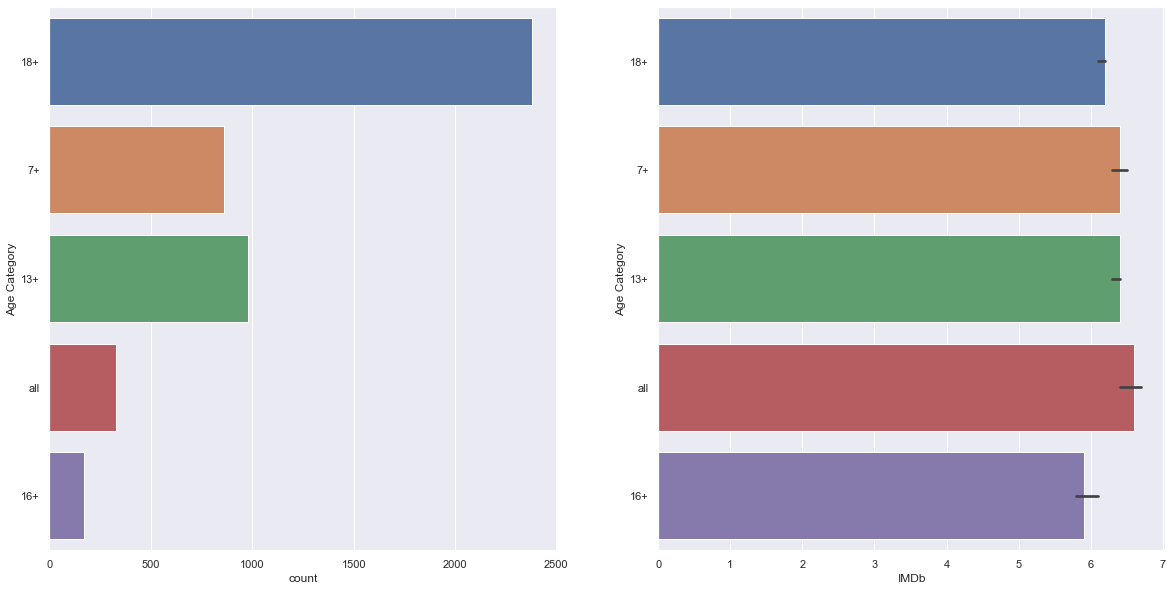

<Figure size 720x720 with 0 Axes>

In [30]:
from numpy import median
fig, ax =plt.subplots(1,2, figsize=(20,10))


sb.countplot(y='Age Category', data=df1, ax = ax[0])

plt.figure(figsize=(10,10))
sb.barplot(x = df1["IMDb"], y = df1["Age Category"], estimator = median, ax=ax[1])


<AxesSubplot:xlabel='IMDb', ylabel='Genres'>

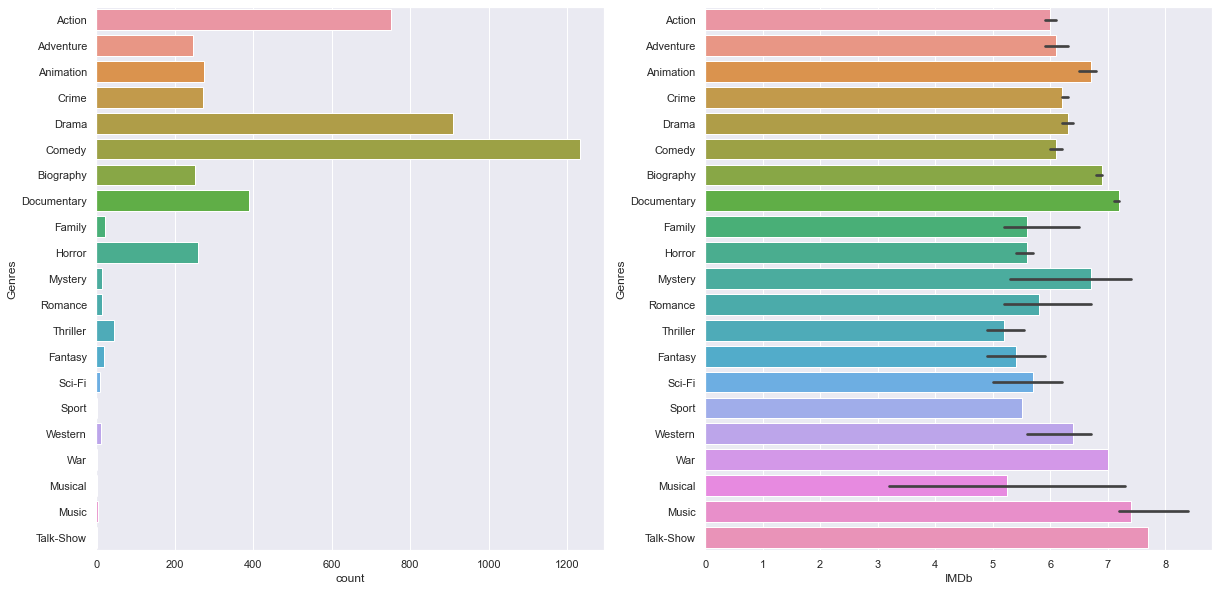

<Figure size 720x720 with 0 Axes>

In [31]:
fig, ax =plt.subplots(1,2, figsize=(20,10))


sb.countplot(y='Genres', data=df1, ax = ax[0])

plt.figure(figsize=(10,10))
sb.barplot(x = df1["IMDb"], y = df1["Genres"], estimator = median, ax=ax[1])

<AxesSubplot:xlabel='IMDb', ylabel='Country'>

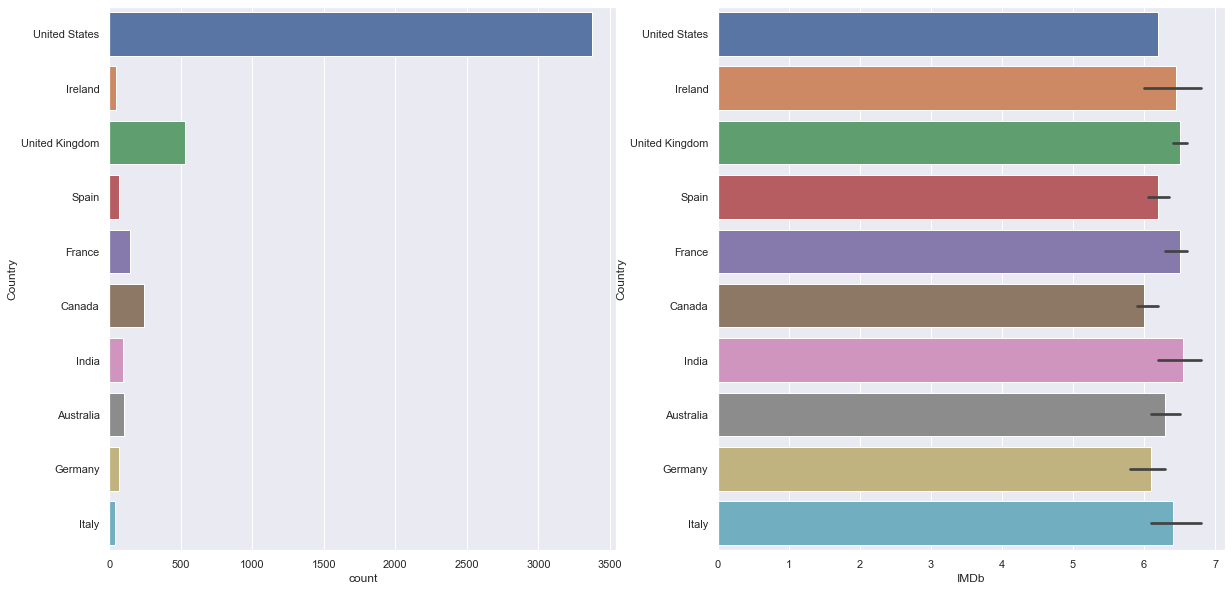

<Figure size 720x720 with 0 Axes>

In [32]:
fig, ax =plt.subplots(1,2, figsize=(20,10))


sb.countplot(y='Country', data=df1, ax = ax[0])

plt.figure(figsize=(10,10))
sb.barplot(x = df1["IMDb"], y = df1["Country"], estimator = median, ax=ax[1])

<AxesSubplot:xlabel='IMDb', ylabel='Language'>

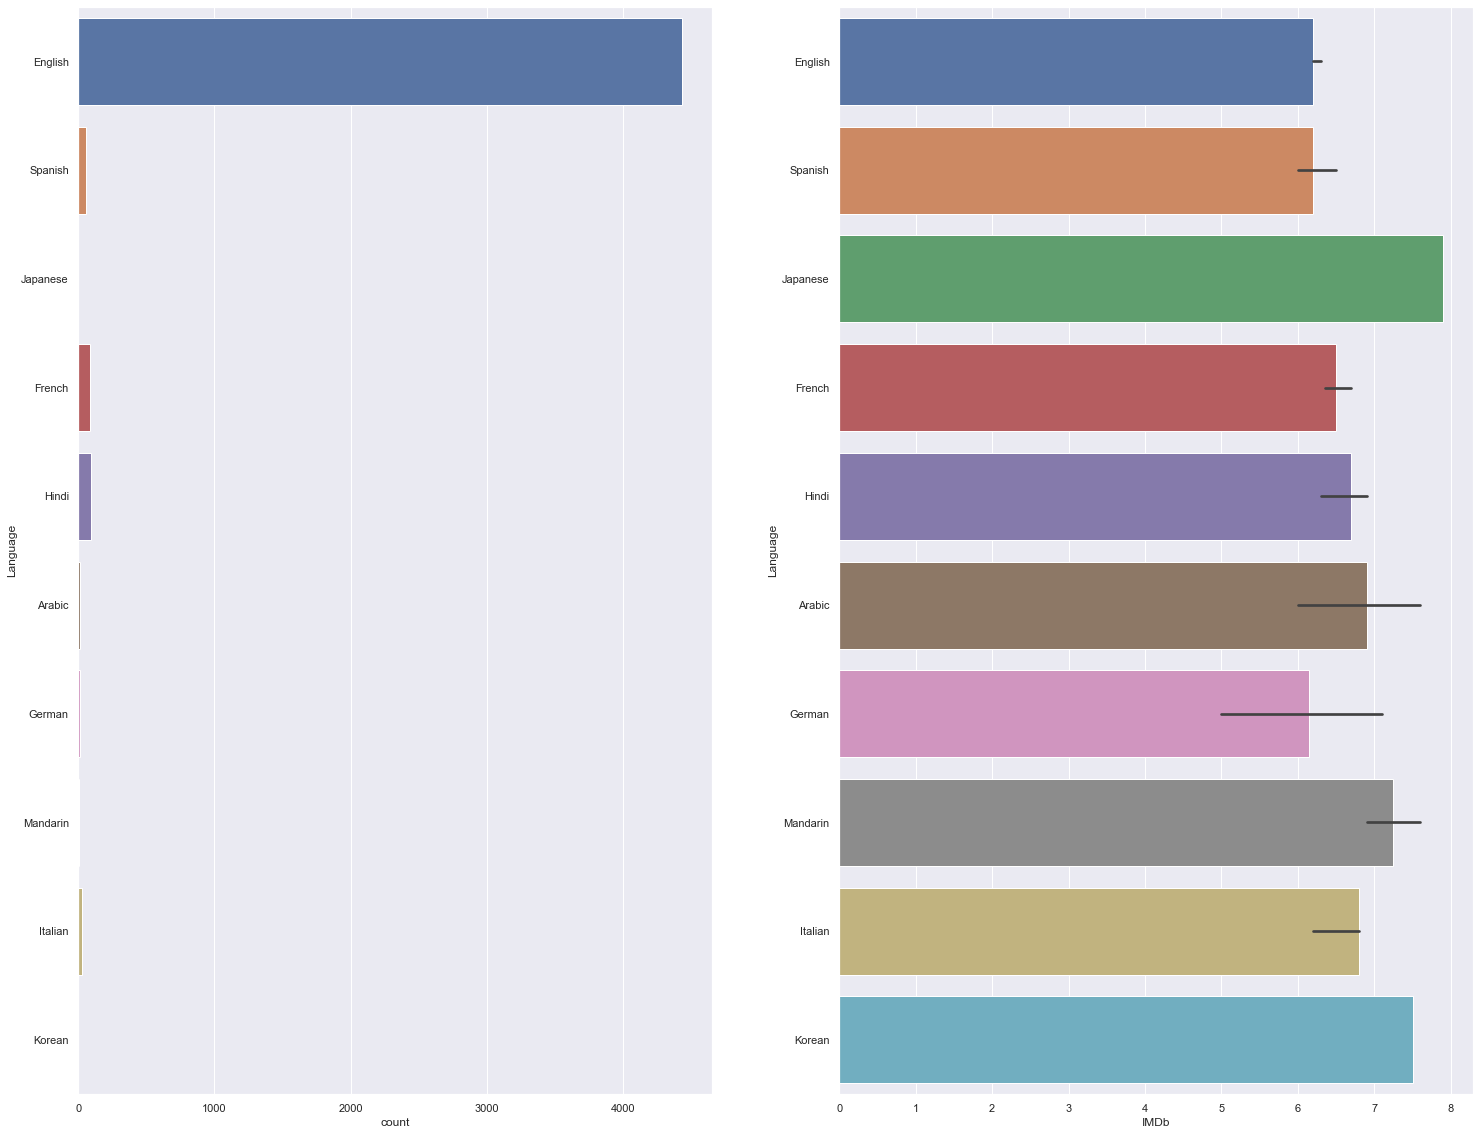

<Figure size 720x720 with 0 Axes>

In [33]:
fig, ax =plt.subplots(1,2, figsize=(25,20))


sb.countplot(y='Language', data=df1, ax = ax[0])

plt.figure(figsize=(10,10))
sb.barplot(x = df1["IMDb"], y = df1["Language"], estimator = median, ax=ax[1])